In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["font.family"] = "NanumGothicCoding"
mpl.rcParams["axes.unicode_minus"] = False
import seaborn as sns
%matplotlib inline

In [2]:
# 전국 신규 민간 아파트 분양 가격 동향
# 2015년 10월부터 2018년 7월까지 주택분양보증을 받아 분양한 전체 민간 신규 아파트 분양가격 동향
# 데이터 다운로드 => https://www.data.go.kr/dataset/3035522/fileData.do, https://goo.gl/oJydAv
# 시각화 도구 설치 및 import
# !pip install plotnine
# !pip install missingno
from plotnine import *
import missingno as msno

In [3]:
# read_csv() 메소드로 읽을 csv 파일의 이름이 한글일 경우 파일의 한글 인코딩 문제로 인해 파일을
# 읽어오지못하는 경우가 발생될 수 있다.
# 한글로된 파일의 이름을 영문으로 변경한 후 읽어오거나 아래와 같이 encoding = "euc-kr" 옵션을
# 지정해서 읽어오면 파일 이름이 한글인 파일도 csv 파일도 잘 읽어올 수 있다.
# 만약에 그래도 읽어오지 못한다면 
# per_sale = pd.read_csv("./data/전국_평균_분양가격_2018.6월_.csv", encoding = "euc-kr", \
#                      engine = "python")
per_sale = pd.read_csv("./data/preSale_2018_6.csv")
per_sale

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
2800,제주,전체,2018,6,3925
2801,제주,전용면적 60㎡이하,2018,6,5462
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,3639
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,NaN


In [4]:
per_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      2805 non-null   object
 1   규모구분     2805 non-null   object
 2   연도       2805 non-null   int64 
 3   월        2805 non-null   int64 
 4   분양가격(㎡)  2674 non-null   object
dtypes: int64(2), object(3)
memory usage: 109.7+ KB


In [5]:
# 연도와 월은 연산에 사용되는 데이터가 아니라 구분에 사용되는 카테고리 형태의 데이터이므로 문자열
# 형태로 변환한다.
per_sale["연도"] = per_sale["연도"].astype(str)
per_sale["월"] = per_sale["월"].astype(str)

In [6]:
per_sale.dtypes

지역명        object
규모구분       object
연도         object
월          object
분양가격(㎡)    object
dtype: object

In [7]:
# 분양가격의 데이터 타입을 숫자로 변경하고 평당 분양 가격을 계산한다.
# to_numeric() 메소드의 errors 속성을 "coerce"로 지정하면 오류가 발생된 데이터를 누락값으로 변경
# 한다.
per_sale["분양가격(㎡)"] = pd.to_numeric(per_sale["분양가격(㎡)"], errors = "coerce")
per_sale["평당분양가격"] = per_sale["분양가격(㎡)"] * 3.3
per_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)    float64
평당분양가격     float64
dtype: object

In [8]:
per_sale

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7
...,...,...,...,...,...,...
2800,제주,전체,2018,6,3925.0,12952.5
2801,제주,전용면적 60㎡이하,2018,6,5462.0,18024.6
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,3639.0,12008.7
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,NaN,NaN


지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    223
평당분양가격     223
dtype: int64


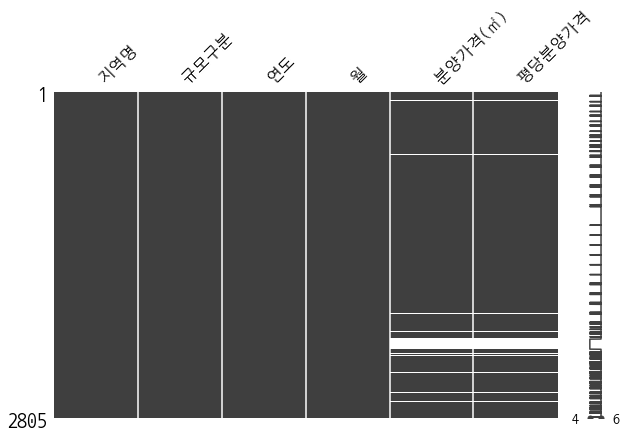

In [9]:
# isnull() 메소드와 sum() 메소드를 사용해서 누락값이 존재하는가 확인하기
print(per_sale.isnull().sum())
# missingno 라이브러리로 그래프를 그려서 누락값 확인하기 => 중간중간에 흰색으로 보이는 부분이
# 누락값을 의미한다.
msno.matrix(per_sale, figsize =(10, 6))
plt.show()

In [10]:
# describe() 메소드로 간단한 통계량을 볼 수 있다.
# include 옵션을 사용해서 통계량을 보려는 데이터의 타입을 지정할 수 있다. 생략시 np.number이
# 기본값으로 사용되며 숫자 데이터에 대해서만 요약 통계량을 출력한다.
# per_sale.describe(include = np.number)
per_sale.describe()

,분양가격(㎡),평당분양가격
count,2582.000000,2582.000000
mean,3056.522851,10086.525407
std,1110.111932,3663.369377
min,1868.000000,6164.400000
25%,2339.000000,7718.700000
50%,2738.500000,9037.050000
75%,3289.000000,10853.700000
max,8098.000000,26723.400000


In [11]:
per_sale.describe(include = np.object)

,지역명,규모구분,연도,월
count,2805,2805,2805,2805
unique,17,5,4,12
top,경북,전용면적 60㎡초과 85㎡이하,2016,4
freq,165,561,1020,255


In [12]:
# 2017년 데이터만 추출한다.
# per_sale_2017 = per_sale[per_sale["연도"] == "2017"]
per_sale_2017 = per_sale.loc[per_sale["연도"] == "2017"]
per_sale_2017

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
1275,서울,전체,2017,1,6450.0,21285.0
1276,서울,전용면적 60㎡이하,2017,1,6662.0,21984.6
1277,서울,전용면적 60㎡초과 85㎡이하,2017,1,6500.0,21450.0
1278,서울,전용면적 85㎡초과 102㎡이하,2017,1,7030.0,23199.0
1279,서울,전용면적 102㎡초과,2017,1,6771.0,22344.3
...,...,...,...,...,...,...
2290,제주,전체,2017,12,3578.0,11807.4
2291,제주,전용면적 60㎡이하,2017,12,5380.0,17754.0
2292,제주,전용면적 60㎡초과 85㎡이하,2017,12,3467.0,11441.1
2293,제주,전용면적 85㎡초과 102㎡이하,2017,12,NaN,NaN


In [13]:
# 같은 값을 가지고 있는 시도별 데이터가 동일한 개수로 저장되어 있다.
per_sale["지역명"].value_counts()

경북    165
충남    165
전북    165
충북    165
경기    165
대전    165
광주    165
세종    165
울산    165
대구    165
경남    165
서울    165
강원    165
인천    165
부산    165
전남    165
제주    165
Name: 지역명, dtype: int64

In [14]:
# 같은 값을 가지고 있는 규모별 데이터가 동일한 개수로 저장되어 있다.
per_sale["규모구분"].value_counts()

전용면적 60㎡초과 85㎡이하     561
전용면적 85㎡초과 102㎡이하    561
전체                   561
전용면적 102㎡초과          561
전용면적 60㎡이하           561
Name: 규모구분, dtype: int64

전국 평균 분양 가격

In [15]:
# pd.options.display.float_format를 사용해서 데이터프레임에 저장된 실수 데이터의 출력 서식을 지정할
# 수 있다.
# 출력서식 {:,.1f}에서 ","는 천 단위마다 ","를 출력하고 "." 뒤의 숫자는 소수점 아래로 표현할 자리
# 수를 의미한다. "f"를 붙이지 않으면 숫자가 지수 형태로 표시된다.
pd.options.display.float_format = "{:,.1f}".format

groupby() 메소드와 pivot table(T 옵션) 활용하기

In [16]:
# 분양가격과 평당분양가격의 요약 통계량이 수평 방향으로 출력된다.
per_sale.groupby(per_sale["연도"]).describe()

분양가격(㎡)                                                         평당분양가격  \
       count    mean     std     min     25%     50%     75%     max  count   
연도                                                                            
2015   243.0 2,788.7   976.9 1,868.0 2,225.0 2,516.0 3,025.5 7,092.0  243.0   
2016   984.0 2,934.2 1,071.4 1,900.0 2,282.0 2,672.0 3,148.5 8,096.0  984.0   
2017   899.0 3,139.5 1,107.6 1,976.0 2,365.0 2,849.0 3,456.0 7,887.0  899.0   
2018   456.0 3,299.4 1,199.3 2,076.0 2,470.5 2,912.5 3,647.2 8,098.0  456.0   

                                                                 
         mean     std     min     25%     50%      75%      max  
연도                                                               
2015  9,202.7 3,223.6 6,164.4 7,342.5 8,302.8  9,984.1 23,403.6  
2016  9,683.0 3,535.8 6,270.0 7,530.6 8,817.6 10,390.0 26,716.8  
2017 10,360.5 3,655.0 6,520.8 7,804.5 9,401.7 11,404.8 26,027.1  
2018 10,888.1 3,957.7 6,850.8 8,152.6 9,611.2 12,035.9 26,723.4

In [17]:
# 분양가격과 평당분양가격의 요약 통계량이 수직 방향으로 출력된다.
per_sale.groupby(per_sale.연도).describe().T

연도                2015     2016     2017     2018
분양가격(㎡) count    243.0    984.0    899.0    456.0
        mean   2,788.7  2,934.2  3,139.5  3,299.4
        std      976.9  1,071.4  1,107.6  1,199.3
        min    1,868.0  1,900.0  1,976.0  2,076.0
        25%    2,225.0  2,282.0  2,365.0  2,470.5
        50%    2,516.0  2,672.0  2,849.0  2,912.5
        75%    3,025.5  3,148.5  3,456.0  3,647.2
        max    7,092.0  8,096.0  7,887.0  8,098.0
평당분양가격  count    243.0    984.0    899.0    456.0
        mean   9,202.7  9,683.0 10,360.5 10,888.1
        std    3,223.6  3,535.8  3,655.0  3,957.7
        min    6,164.4  6,270.0  6,520.8  6,850.8
        25%    7,342.5  7,530.6  7,804.5  8,152.6
        50%    8,302.8  8,817.6  9,401.7  9,611.2
        75%    9,984.1 10,390.0 11,404.8 12,035.9
        max   23,403.6 26,716.8 26,027.1 26,723.4

전국 규모별 평균 분양 가격

In [18]:
# pivot_table(values, index, colunms, aggfunc, fill_value) => values, index, colunms는 필수
# values : 통계 함수를 적용할 데이터프레임의 열 => 피벗 테이블 데이터
# index : 그룹화의 첫 번째 기준으로 사용되는 피벗 테이블로 가져올 데이터프레임의 열
# colunms : 그룹화의 두 번째 기준으로 사용되는 피벗 테이블로 가져올 데이터프레임의 열
# aggfunc : index와 columns로 그룹화된 values에 적용할 함수를 문자열로 입력한다. 생략 가능하고
# 생략시 기본값은 평균을 계산하는 mean 함수이다.
# fill_value : NaN를 대체할 데이터를 입력한다. => 생략시 0이 기본값으로 사용된다.
per_sale.pivot_table("평당분양가격", "규모구분", "연도")

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837.2","10,388.7","11,334.5","11,259.8"
전용면적 60㎡이하,"8,951.5","9,398.9","10,246.1","10,957.3"
전용면적 60㎡초과 85㎡이하,"8,891.8","9,296.0","9,825.0","10,438.1"
전용면적 85㎡초과 102㎡이하,"9,518.5","10,122.4","10,540.4","11,456.8"
전체,"8,893.0","9,293.0","9,901.3","10,560.3"


In [19]:
per_sale.pivot_table("평당분양가격", ["연도", "월"], "규모구분")

규모구분     전용면적 102㎡초과  전용면적 60㎡이하  전용면적 60㎡초과 85㎡이하  전용면적 85㎡초과 102㎡이하       전체
연도   월                                                                        
2015 10      9,631.8     8,794.9           8,832.0            9,417.0  8,823.2
     11      9,932.8     8,903.6           8,875.6            9,586.5  8,879.3
     12      9,947.1     9,156.1           8,967.8            9,552.1  8,976.6
2016 1       9,915.8     9,195.2           9,035.2            9,554.1  9,043.0
     10     10,791.6     9,651.5           9,554.7           10,082.7  9,540.7
     11     11,061.4     9,673.9           9,499.0           10,147.9  9,492.0
     12     11,261.9     9,829.9           9,559.7           10,245.9  9,572.9
     2       9,861.1     9,228.2           9,033.1            9,726.0  9,052.7
     3       9,952.1     9,218.8           9,059.3           10,006.8  9,063.7
     4      10,282.2     9,260.4           9,173.8           10,230.0  9,177.5
     5      10,177.2     9,343.3           9,210.1           10,161.8  9,219.2
     6      10,181.1     9,302.1           9,340.2           10,349.9  9,315.9
     7      10,225.0     9,310.1           9,368.3           10,377.4  9,332.4
     8      10,355.2     9,290.7           9,380.2           10,315.8  9,360.9
     9      10,361.2     9,449.8           9,338.4           10,295.6  9,345.6
2017 1      11,268.9     9,856.5           9,549.8           10,246.3  9,563.0
     10     10,909.8    10,475.0           9,916.3           10,749.4 10,091.0
     12     11,127.2    10,772.1          10,069.3           10,933.8 10,287.3
     2      11,319.8     9,888.0           9,571.4           10,190.0  9,590.0
     3      11,235.9     9,976.9           9,564.0           10,184.6  9,580.3
     4      11,341.1    10,130.8           9,687.6           10,200.5  9,725.1
     5      11,562.4    10,231.2           9,821.4           10,323.8  9,845.6
     6      11,537.8    10,182.4           9,888.0           10,605.4  9,940.2
     7      11,488.3    10,346.7          10,028.7           10,820.9 10,083.1
     8      11,543.6    10,354.8          10,012.2           10,858.3 10,077.6
     9      11,266.2    10,582.5           9,966.4           11,144.1 10,130.8
2018 1      11,220.2    10,839.4          10,160.5           11,286.0 10,362.8
     2      11,243.1    10,852.2          10,281.1           11,292.6 10,416.2
     3      11,320.3    10,970.7          10,430.7           11,505.6 10,568.3
     4      11,125.8    11,002.2          10,496.5           11,575.6 10,625.0
     5      11,536.8    11,028.0          10,641.1           11,727.1 10,741.9
     6      11,101.9    11,038.5          10,618.4           11,340.1 10,647.7

전국 지역별 평균 분양 가격

In [21]:
# 규모구분이 전체로 되어있는 금액으로 연도별 변동 금액을 살펴보자
# 규모구분이 전체인 데이터만 추출한다.
region_year_all = per_sale[per_sale["규모구분"] == "전체"]
region_year = region_year_all.pivot_table("평당분양가격", "지역명", "연도").reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,159.9","7,011.1","7,126.8","7,642.8"
1,경기,"10,377.4","11,220.0","11,850.0","12,854.0"
2,경남,"7,585.6","7,847.9","8,119.8","8,894.0"
3,경북,"7,170.9","7,360.7","7,794.9","8,261.6"
4,광주,"8,052.0","8,898.7","9,463.5","9,629.9"
5,대구,"9,232.3","10,310.0","11,455.8","11,651.7"
6,대전,"8,098.2","8,501.6","9,044.7","9,588.7"
7,부산,"10,307.0","10,429.9","11,577.9","12,709.9"
8,서울,"19,725.2","20,663.5","21,375.9","22,299.2"
9,세종,"8,750.5","8,860.5","9,135.3","10,381.8"


전국 지역별 평균 분양 가격 변동 금액

In [29]:
region_year["변동액"] = region_year["2018"] - region_year["2015"]
max_delta_price = np.max(region_year["변동액"]) * 1000
min_delta_price = np.min(region_year["변동액"]) * 1000
mean_delta_price = np.mean(region_year["변동액"]) * 1000

print("2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역의 ", end = "")
print("제주로 상승액은 평당 {:,.0f}원 이다.".format(max_delta_price))
print("상승액이 가장 적은 지역은 울산이며 상승액은 평당 {:,.0f}원 이다.".format(min_delta_price))
print("전국 평균 변동액은 평당 {:,.0f}원 이다.".format(mean_delta_price))
region_year

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역의 제주로 상승액은 평당 5,335,550원 이다.
상승액이 가장 적은 지역은 울산이며 상승액은 평당 387,750원 이다.
전국 평균 변동액은 평당 1,667,276원 이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,159.9","7,011.1","7,126.8","7,642.8",482.9
1,경기,"10,377.4","11,220.0","11,850.0","12,854.0","2,476.6"
2,경남,"7,585.6","7,847.9","8,119.8","8,894.0","1,308.4"
3,경북,"7,170.9","7,360.7","7,794.9","8,261.6","1,090.7"
4,광주,"8,052.0","8,898.7","9,463.5","9,629.9","1,577.9"
5,대구,"9,232.3","10,310.0","11,455.8","11,651.7","2,419.4"
6,대전,"8,098.2","8,501.6","9,044.7","9,588.7","1,490.5"
7,부산,"10,307.0","10,429.9","11,577.9","12,709.9","2,403.0"
8,서울,"19,725.2","20,663.5","21,375.9","22,299.2","2,574.0"
9,세종,"8,750.5","8,860.5","9,135.3","10,381.8","1,631.3"


plotnine 패키지를 이용한 시각화

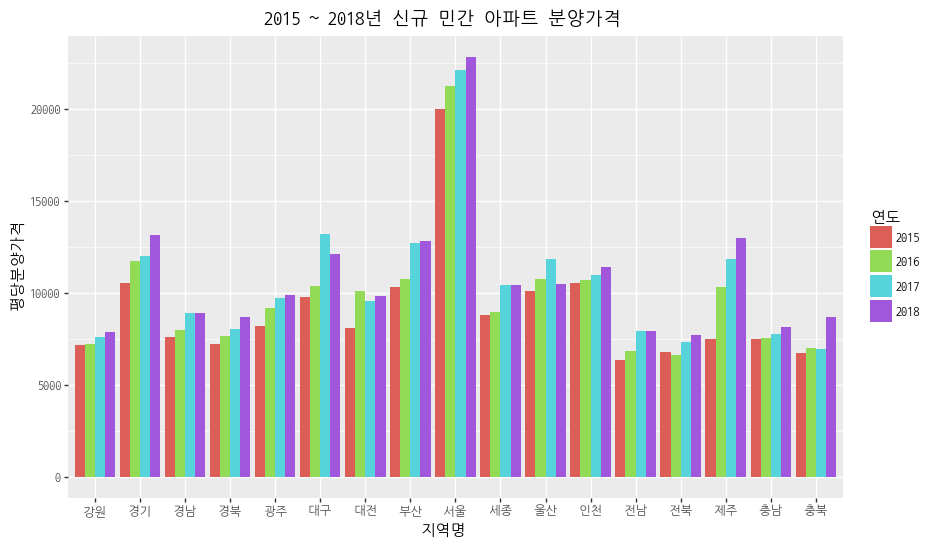

<ggplot: (-9223371898577468563)>

In [45]:
ggplot(region_year_all, aes(x = "지역명", y = "평당분양가격", fill = "연도")) \
    + geom_bar(stat = "identity", position = "dodge") \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6)) \
    + ggtitle("2015 ~ 2018년 신규 민간 아파트 분양가격")

In [48]:
# 규모별 지역별 평당 분양가격 합계
per_sale.pivot_table("평당분양가격", "규모구분", "지역명", "sum")

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"251,862.6","435,246.9","295,092.6","274,744.8","269,910.3","393,699.9","171,388.8","402,675.9","705,104.4","296,280.6","249,361.2","428,904.3","241,589.7","249,381.0","302,606.7","271,256.7","252,813.0"
전용면적 60㎡이하,"229,911.0","393,587.7","266,250.6","244,675.2","229,336.8","360,112.5","282,097.2","341,002.2","703,220.1","253,984.5","224,119.5","347,298.6","223,360.5","229,878.0","382,206.0","248,707.8","222,436.5"
전용면적 60㎡초과 85㎡이하,"230,914.2","372,794.4","258,815.7","245,028.3","293,092.8","348,450.3","280,919.1","356,330.7","662,966.7","295,584.3","340,827.3","342,998.7","222,182.4","219,789.9","317,047.5","239,484.3","224,594.7"
전용면적 85㎡초과 102㎡이하,"182,688.0","384,918.6","314,694.6","219,407.1","176,625.9","227,924.4","234,973.2","351,063.9","758,844.9","294,726.3","115,193.1","361,142.1","251,446.8","232,158.3","236,359.2","236,662.8","260,637.3"
전체,"229,864.8","373,246.5","259,614.3","245,153.7","292,818.9","347,341.5","283,338.0","359,696.7","676,067.7","295,356.6","340,101.3","343,256.1","222,644.4","220,073.7","327,350.1","239,167.5","222,924.9"


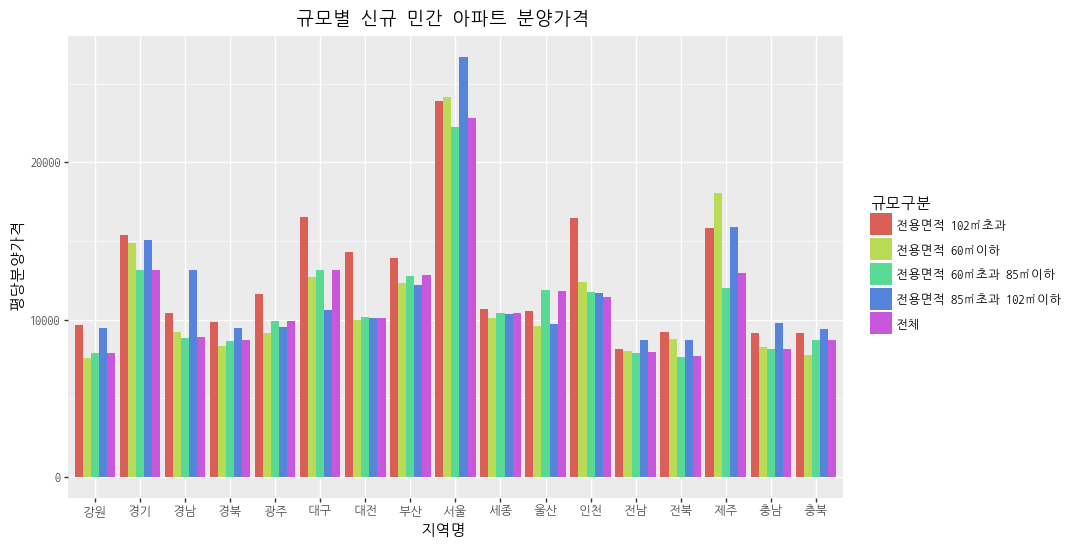

<ggplot: (-9223371898575712971)>

In [53]:
# 규모별
ggplot(per_sale, aes(x = "지역명", y = "평당분양가격", fill = "규모구분")) \
    + geom_bar(stat = "identity", position = "dodge") \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6)) \
    + ggtitle("규모별 신규 민간 아파트 분양가격")

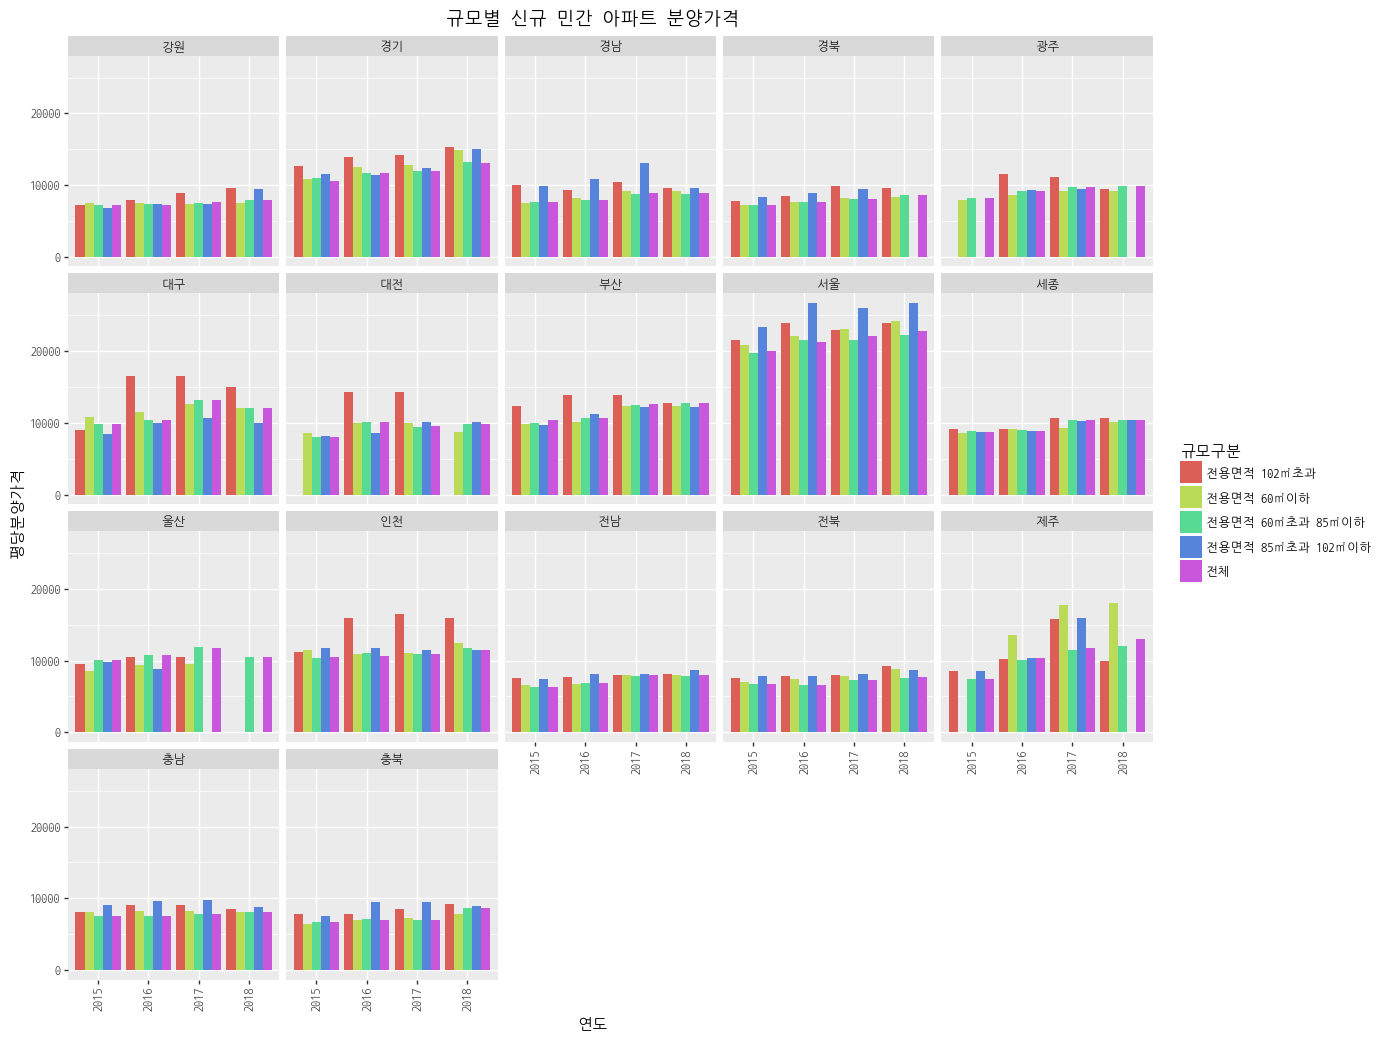

<ggplot: (138278515867)>

In [56]:
# 위의 그래프를 지역별로 나눠보자
ggplot(per_sale, aes(x = "연도", y = "평당분양가격", fill = "규모구분")) \
    + geom_bar(stat = "identity", position = "dodge") \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (14, 12), 
           axis_text_x = element_text(rotation = 90)) \
    + ggtitle("규모별 신규 민간 아파트 분양가격") \
    + facet_wrap("지역명")

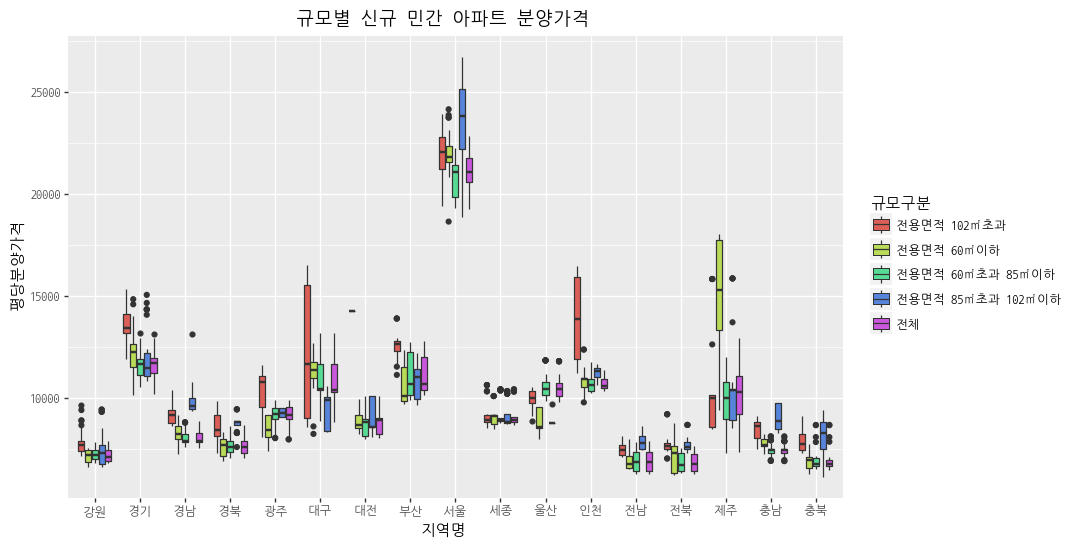

<ggplot: (-9223371898575918662)>

In [57]:
# boxplot을 그려보자
ggplot(per_sale, aes(x = "지역명", y = "평당분양가격", fill = "규모구분")) \
    + geom_boxplot() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6)) \
    + ggtitle("규모별 신규 민간 아파트 분양가격")

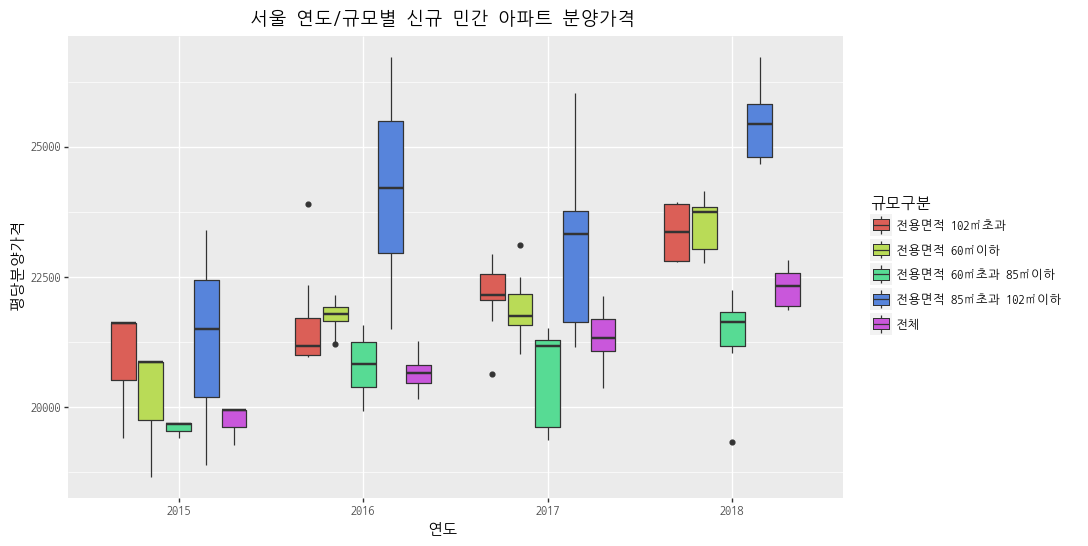

<ggplot: (-9223371898575213473)>

In [58]:
# 서울
per_sale_seoul = per_sale[per_sale["지역명"] == "서울"]
ggplot(per_sale_seoul, aes(x = "연도", y = "평당분양가격", fill = "규모구분")) \
    + geom_boxplot() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6)) \
    + ggtitle("서울 연도/규모별 신규 민간 아파트 분양가격")

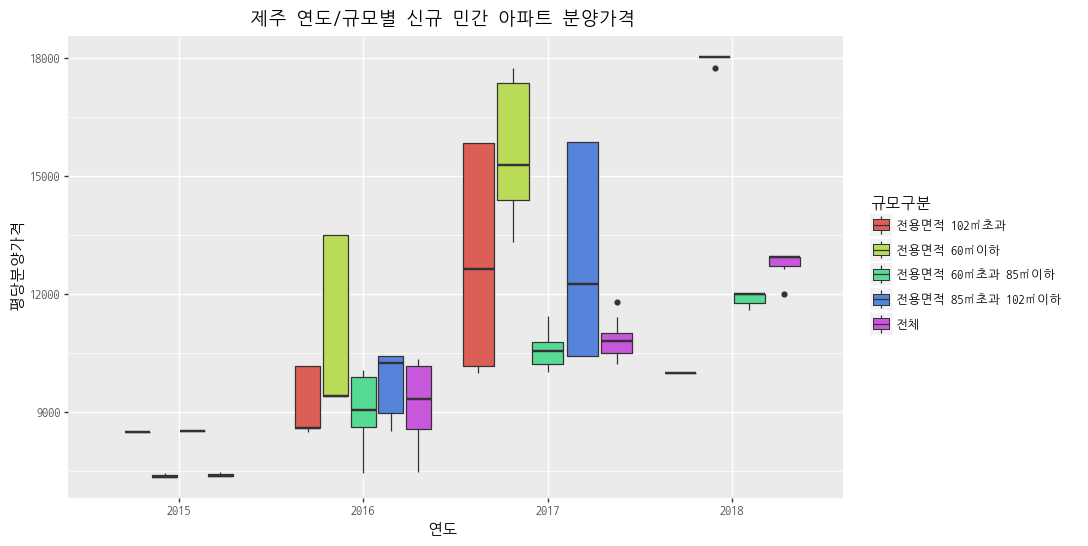

<ggplot: (-9223371898575787818)>

In [60]:
# 제주
per_sale_jeju = per_sale[per_sale["지역명"] == "제주"]
ggplot(per_sale_jeju, aes(x = "연도", y = "평당분양가격", fill = "규모구분")) \
    + geom_boxplot() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6)) \
    + ggtitle("제주 연도/규모별 신규 민간 아파트 분양가격")

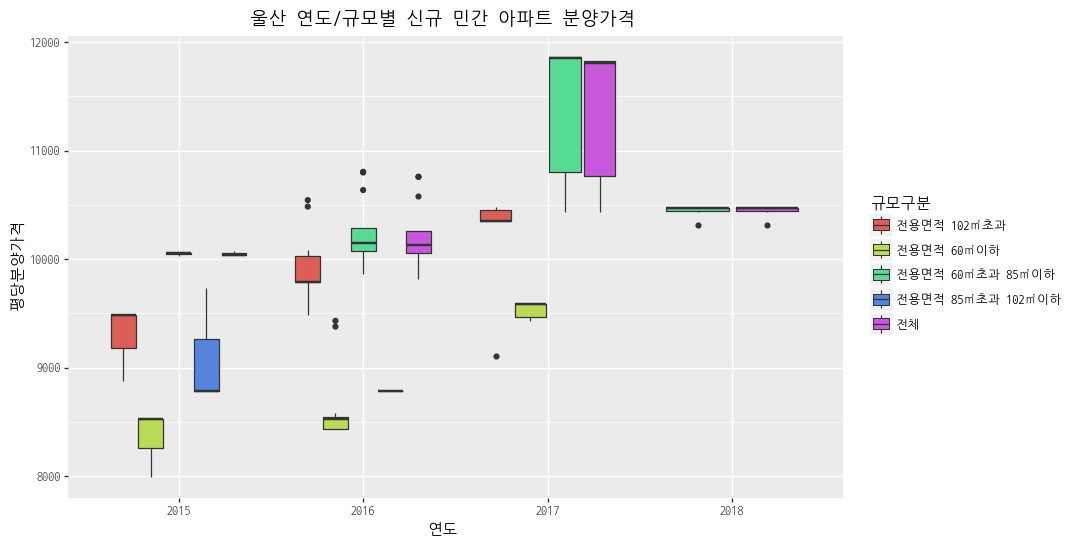

<ggplot: (138278987959)>

In [61]:
# 제주
per_sale_ulsan = per_sale[per_sale["지역명"] == "울산"]
ggplot(per_sale_ulsan, aes(x = "연도", y = "평당분양가격", fill = "규모구분")) \
    + geom_boxplot() \
    + theme(text = element_text(family = "NanumGothicCoding"), figure_size = (10, 6)) \
    + ggtitle("울산 연도/규모별 신규 민간 아파트 분양가격")